# AirBnB Data Analytics Project

## Data Exploration

### Import Libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)

### Load the Dataset

In [100]:
df = pd.read_csv("data/market_analysis_2019.csv", delimiter=";")

### Understand the Data

In [101]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29928 entries, 0 to 29927
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unified_id    29928 non-null  object 
 1   month         29928 non-null  object 
 2   zipcode       29928 non-null  int64  
 3   city          29928 non-null  object 
 4   host_type     29928 non-null  object 
 5   bedrooms      29928 non-null  int64  
 6   bathrooms     29928 non-null  float64
 7   guests        29928 non-null  object 
 8   revenue       29912 non-null  object 
 9   openness      29928 non-null  int64  
 10  occupancy     29928 non-null  object 
 11  nightly rate  23486 non-null  object 
 12  lead time     21897 non-null  object 
 13  length stay   21897 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 3.2+ MB


In [102]:
df.head(10)

,unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly rate,lead time,length stay
0,AIR10000347,2019-1,92315,Big Bear Lake,2-5 Units,3,2.0,10,"13948,75974",31,1,"449,9599915",8,65
1,AIR10000347,2019-10,92315,Big Bear Lake,2-5 Units,3,2.0,10,"449,9599915",31,"0,032258065","449,9599915",8,1
2,AIR10000347,2019-11,92315,Big Bear Lake,2-5 Units,3,2.0,10,0,30,0,NaN,NaN,NaN
3,AIR10000347,2019-12,92315,Big Bear Lake,2-5 Units,3,2.0,10,"4949,679932",31,"0,35483871","449,9709029",41,"2,4"
4,AIR10000347,2019-2,92315,Big Bear Lake,2-5 Units,3,2.0,10,0,28,0,NaN,NaN,NaN
5,AIR10000347,2019-3,92315,Big Bear Lake,2-5 Units,3,2.0,10,"899,9199829",31,"0,064516129","449,9599915",8,1
6,AIR10000347,2019-4,92315,Big Bear Lake,2-5 Units,3,2.0,10,0,30,0,NaN,NaN,NaN
7,AIR10000347,2019-5,92315,Big Bear Lake,2-5 Units,3,2.0,10,0,31,0,NaN,NaN,NaN
8,AIR10000347,2019-6,92315,Big Bear Lake,2-5 Units,3,2.0,10,"11248,99979",30,"0,833333333","449,9599915",8,39
9,AIR10000347,2019-7,92315,Big Bear Lake,2-5 Units,3,2.0,10,"6749,399872",31,"0,483870968","449,9599915",8,1


## Data Cleaning

### Drop Unecessary Columns

Columns that look useful:
unified_id (make sure there are no airbnb's poster multiple times)
zipcode (to find most popular location)
host_type (to see if most airbnb renters are professionals or individuals)
revenue (to find most profitable zipcode for property owners)
nightly rate (to find out which zipcodes are most expensive)
length stay (to find average length of stay)


In [103]:
# Dropping Columns by selecting just what we want
# Copy-paste in the list of columns then delete those we don't want
df = df[["unified_id", "zipcode", "host_type", "revenue", "nightly rate", "length stay"]]
df.head()

,unified_id,zipcode,host_type,revenue,nightly rate,length stay
0,AIR10000347,92315,2-5 Units,"13948,75974","449,9599915",65
1,AIR10000347,92315,2-5 Units,"449,9599915","449,9599915",1
2,AIR10000347,92315,2-5 Units,0,NaN,NaN
3,AIR10000347,92315,2-5 Units,"4949,679932","449,9709029","2,4"
4,AIR10000347,92315,2-5 Units,0,NaN,NaN



### Change string columns with numbers to integers

In [104]:
# drop null values in revenue column
df = df.loc[df["revenue"].notna()]
# drop null values in revenue column
df = df.loc[df["nightly rate"].notna()]
# drop null values in revenue column
df = df.loc[df["length stay"].notna()]

In [105]:

# change string columns with numbers to ints
df["revenue"] = df["revenue"].str.replace(',', '.').astype(float)
df["nightly rate"] = df["nightly rate"].str.replace(',', '.').astype(float)
df["length stay"] = df["length stay"].str.replace(',', '.').astype(float)

### Group rows by their ID and take the mean their monthly revenues

In [106]:
# makes sure there is only one row per unified ID with the properties average revenue
df_small = df.groupby("unified_id")[["revenue", "nightly rate", "length stay", ]].mean()


### Also group rows by other columns we want to keep

In [107]:
df_rest = df.groupby("unified_id")[["zipcode", "host_type"]].first()

### Combine the groups we have made to explore

In [108]:
# Manually combine the two data frames df_small and df_rest
result = df_small
for col in df_rest.columns:
    result[col] = df_rest[col]

print(result)

                  revenue  nightly rate  length stay  zipcode      host_type
unified_id                                                                  
AIR10000347   4949.574910    449.961355    13.925000    92315      2-5 Units
AIR10035983   9353.989960    301.741612    45.000000    92315  Single Owners
AIR10052559   6127.909044    496.599760     6.857143    92315  Professionals
AIR10178668   8568.894974    394.152935     6.879076    92315  Professionals
AIR10204420  11126.736616    475.675302     2.665197    92252      2-5 Units
...                   ...           ...          ...      ...            ...
AIR9959855    5131.132481    277.476292     1.693495    92315  Professionals
AIR9960008    6325.777486    327.895149     1.834647    92315  Professionals
AIR9976790    7674.483287    388.677514     1.711240    92315  Professionals
AIR9986505    6409.169913    340.363838     1.986441    92252      2-5 Units
AIR9996370    1351.529163    203.996001     2.267593    92314  Single Owners

## Exploratory Data Analysis / Statistical Analysis

### Which zipcode had the highest/lowest/most versatile monthly revenues?

<Axes: title={'center': 'revenue'}, xlabel='zipcode'>

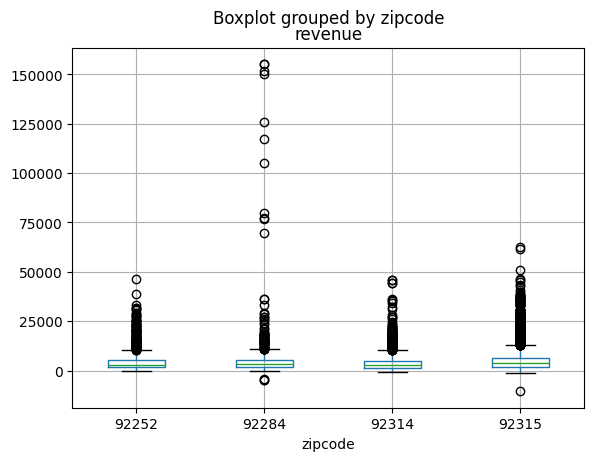

In [109]:
df.boxplot(column='revenue',by='zipcode')

In [110]:
print(result.loc[result["revenue"] == result["revenue"].max()][["zipcode", "revenue"]])

result.loc[result["revenue"] == result["revenue"].min()][["zipcode", "revenue"]]



             zipcode        revenue
unified_id                         
AIR25012960    92284  114959.438165


,zipcode,revenue
unified_id,,
AIR25459712,92284,-4586.953176


### Is there a correlation between host_type (single home, 2-5 units, or professionals) and the amount of revenue made? 

<Axes: title={'center': 'host_type vs revenue'}, xlabel='host_type', ylabel='revenue'>

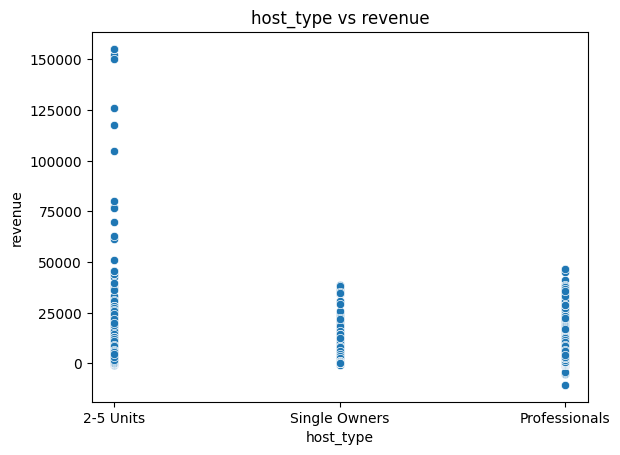

In [111]:
plt.title("host_type vs revenue")
sns.scatterplot(data=df, x="host_type", y="revenue")

In [112]:
print(result.loc[result["revenue"] == result["revenue"].max()][["host_type", "revenue"]])
result.loc[result["revenue"] == result["revenue"].min()][["host_type", "revenue"]]

             host_type        revenue
unified_id                           
AIR25012960  2-5 Units  114959.438165


,host_type,revenue
unified_id,,
AIR25459712,Professionals,-4586.953176


### How does nightly rate affect the length of stay in California AirBnB’s?

<Axes: title={'center': 'how nightly rate affects length of stay'}, xlabel='nightly rate', ylabel='length stay'>

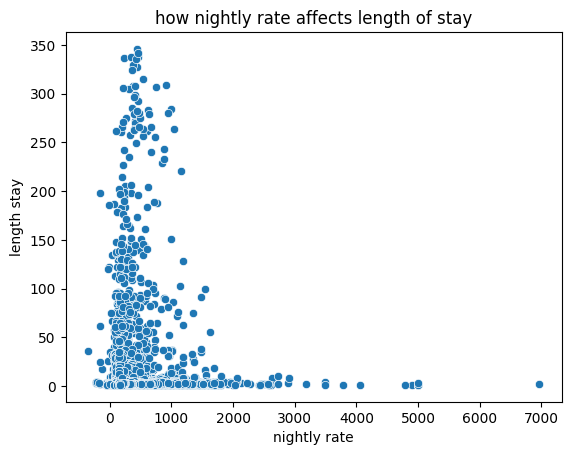

In [113]:
plt.title("how nightly rate affects length of stay")
sns.scatterplot(data=df, x="nightly rate", y="length stay")

In [114]:
print(result.loc[result["nightly rate"] == result["nightly rate"].max()][["zipcode", "nightly rate"]])

print(result.loc[result["nightly rate"] == result["nightly rate"].min()][["zipcode", "nightly rate"]])

result.loc[result["nightly rate"] < 0].count()


             zipcode  nightly rate
unified_id                        
AIR40783673    92252   6965.666667
             zipcode  nightly rate
unified_id                        
AIR25459712    92284   -160.009995


revenue         2
nightly rate    2
length stay     2
zipcode         2
host_type       2
dtype: int64